#**Millestones 1**
## **The Comparison of Community Gaming Features on "Steam": Correlation and Significance of the Factors**

Nadia Oktiarsy, FSDS Batch-016 RMT (Buddy: Hana)

---
```
Table of Contents:
1. Introduction
2. Problem Statement
3. Objection and Goals
4. Data Exploration
   4.1. Importing Libraries
   4.2. Data Loading
        - Overall data,
        - Basic data information,
        - Release Date,
        - Genres, categories, and platforms,
        - Creating additional data features
5. Data Cleaning
   5.1. 
6. Data Analysis
7. Conclusion and Suggestion
```

Link Tableau (by Nadia Oktiarsy):
1. Page 1: https://public.tableau.com/views/SteamAnalysisDashboard/Steam_page_1?:language=en-US&:display_count=n&:origin=viz_share_link
2. Page 2: https://public.tableau.com/views/SteamAnalysisDashboardpart2/Steam_page_2?:language=en-US&:display_count=n&:origin=viz_share_link

**Have fun while reading my tableau, cheers!**


---
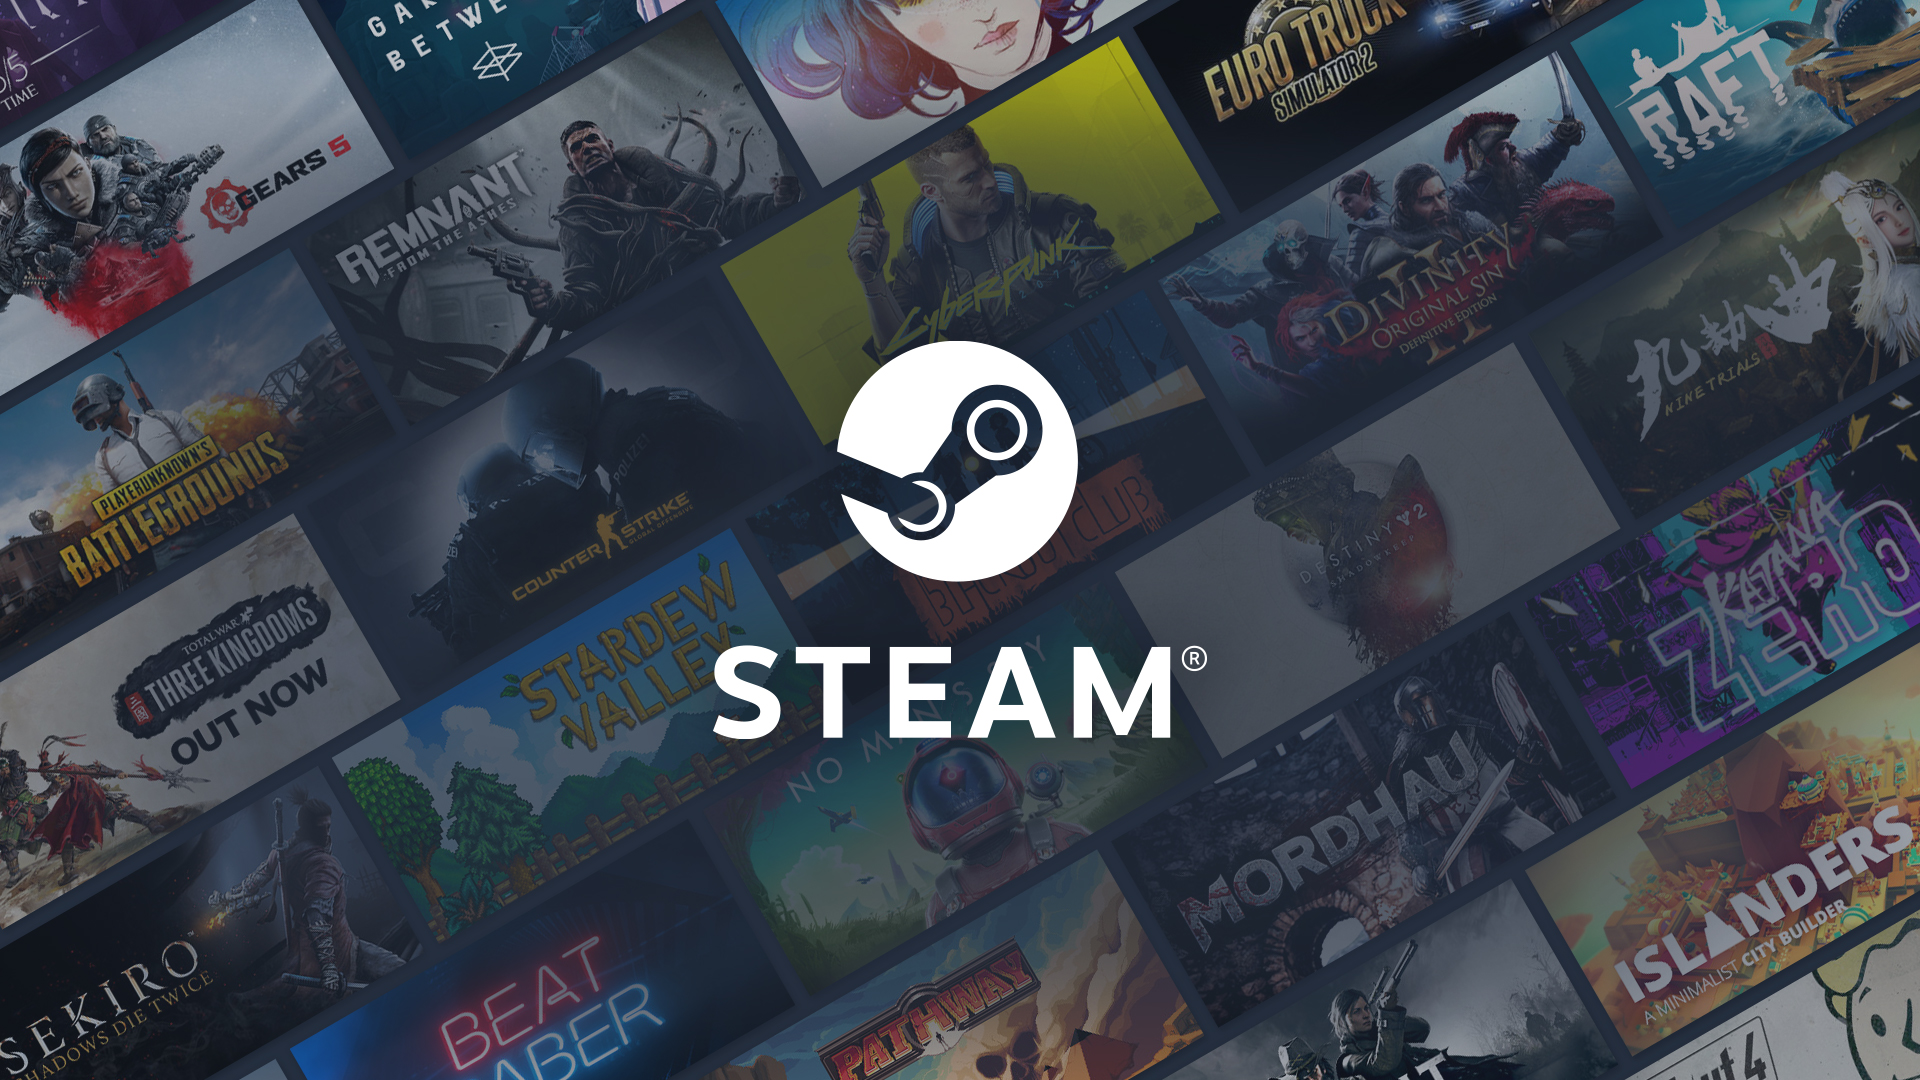

## **1. Introduction**

Steam is one of the biggest video game digital distribution service and storefronts by Valve. It was launched as a software client in September 2003 as a way for Valve to provide automatic updates for their games, and expanded to distributing and offering third-party game publishers' titles in late 2005. Steam provides the user with automatic game updating, saved game cloud synchronization, and community features such as friends messaging, in-game chat and a community market.

Steam has been a gaming community platform that users can choose to play as a single-player, multi-player, or any online video game in which a player interacts with a large number of other players which is usually called as Massively Multiplayer Online (MMO).

An indie gaming company (IndComp) is planning to make a game, and  distribute the game on Steam. However, IndComp needs to figure out what kind of game that should make, so they decide to ask a data scientist to analyze the current and predict the future trend of games published on Steam.

---
## **2. Problem Statement**

The first thing to understand about the context of Steam as a gaming platform is by understanding the dataset provided. To evaluate the features, we will take community game style (Single-player, Multi-player, and Massive Multiplayer Online). The analysis will be focusing more about the main question here: "*What is the Steam users preference for purchasing a game?*"

Questions that will be raised in this analysis to support the main question, based on SMART, are:

- **Specific:** What is the correlation of number of players with price and gaming features statistically?
- **Measurable:** How much money each user wants to pay for this new game to gain the profit than the cost production?
- **Action-oriented:** What features that the game should provide to gain more players' interest to buy the game?
- **Relevant:** What is the most important factors that makes games on Steam popular?
- **Time-bound:** Has Steam as gaming community platform become more or less popular in the last three years?

---
## **3. Objection and Goals**

The main objection from this analysis is **to propose what kind of game** that the IndComp should make as their project. The game should includes **the suggested features** that is the most popular on Steam. To understand this, not only from features, we should see people's feedback and rating about the game.

In order to gain more profits, we have some choices what to aim when selling the game products on Steam. These are some factors that hypothetically significant:

1. Language
2. Achievements
3. Ratings
4. Price
5. Average Playtime

The hypotesis testing will be using **Correlation analysis** (Descriptive Statistics) and **One Sample Two Tailed testing** (Inferential Statistics).

## **4. Data Preparation**

Provided dataset is the combined data of 27,000 games scraped from Steam and SteamSpy APIs. The ranged date in the dataset is based on the game released, not publish on Steam.
- Source: [Steam Store Games](https://www.kaggle.com/datasets/nikdavis/steam-store-games/code)

### **4.1. Importing Libraries**

In [1]:
# Importing general libraries
import numpy as np
import pandas as pd
from scipy.stats import norm
from scipy import stats
import sys

# Data visualization libraries
import seaborn as sns
palette = sns.color_palette("Blues_d")
default_color = palette[3]

import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20,8)

# GoogleCloud Setup
from google.colab import auth
from google.cloud import bigquery
from google.colab import data_table

project = 'hacktiv8-016-nadiaoktiarsy' # Project ID inserted based on the query results selected to explore
location = 'US'                        # Location inserted based on the query results selected to explore
client = bigquery.Client(project=project, location=location)
auth.authenticate_user()

# Format
pd.options.display.float_format = '{:.2f}'.format
data_table.enable_dataframe_formatter()

### **4.2. Data Reviews**

Data loading will show:
  - Overall data,
  - Creating additional data features
  - Basic information,
  - Release Date,
  - Genres, categories, and platforms

#### **1. Overall Data**

Overall data is to show the raw data that has not been cleaned or rearranged yet. We can see the total rows is `27075` and total columns is `18`.

In [2]:
# Data Loading Raw
url = 'https://raw.githubusercontent.com/nadiaoktiarsy/hacktiv8_p0/main/steam.csv'
df = pd.read_csv(url)

In [3]:
df.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [4]:
df.tail()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
27070,1065230,Room of Pandora,2019-04-24,1,SHEN JIAWEI,SHEN JIAWEI,windows,0,Single-player;Steam Achievements,Adventure;Casual;Indie,Adventure;Indie;Casual,7,3,0,0,0,0-20000,2.09
27071,1065570,Cyber Gun,2019-04-23,1,Semyon Maximov,BekkerDev Studio,windows,0,Single-player,Action;Adventure;Indie,Action;Indie;Adventure,0,8,1,0,0,0-20000,1.69
27072,1065650,Super Star Blast,2019-04-24,1,EntwicklerX,EntwicklerX,windows,0,Single-player;Multi-player;Co-op;Shared/Split ...,Action;Casual;Indie,Action;Indie;Casual,24,0,1,0,0,0-20000,3.99
27073,1066700,New Yankee 7: Deer Hunters,2019-04-17,1,Yustas Game Studio,Alawar Entertainment,windows;mac,0,Single-player;Steam Cloud,Adventure;Casual;Indie,Indie;Casual;Adventure,0,2,0,0,0,0-20000,5.19
27074,1069460,Rune Lord,2019-04-24,1,Adept Studios GD,Alawar Entertainment,windows;mac,0,Single-player;Steam Cloud,Adventure;Casual;Indie,Indie;Casual;Adventure,0,4,0,0,0,0-20000,5.19


In [5]:
# Checking if the dataframe is already in the type we want to use
df['appid'] = df['appid'].apply(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             27075 non-null  object 
 1   name              27075 non-null  object 
 2   release_date      27075 non-null  object 
 3   english           27075 non-null  int64  
 4   developer         27075 non-null  object 
 5   publisher         27075 non-null  object 
 6   platforms         27075 non-null  object 
 7   required_age      27075 non-null  int64  
 8   categories        27075 non-null  object 
 9   genres            27075 non-null  object 
 10  steamspy_tags     27075 non-null  object 
 11  achievements      27075 non-null  int64  
 12  positive_ratings  27075 non-null  int64  
 13  negative_ratings  27075 non-null  int64  
 14  average_playtime  27075 non-null  int64  
 15  median_playtime   27075 non-null  int64  
 16  owners            27075 non-null  object

In [6]:
# Checking if there is any Null value
df.isnull().sum()

appid               0
name                0
release_date        0
english             0
developer           0
publisher           0
platforms           0
required_age        0
categories          0
genres              0
steamspy_tags       0
achievements        0
positive_ratings    0
negative_ratings    0
average_playtime    0
median_playtime     0
owners              0
price               0
dtype: int64

In [7]:
data_table.disable_dataframe_formatter()

# Describing the overall raw data
round(df.describe(), 2)

,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price
count,27075.00,27075.00,27075.00,27075.00,27075.00,27075.00,27075.00,27075.00
mean,0.98,0.35,45.25,1000.56,211.03,149.80,146.06,6.08
std,0.14,2.41,352.67,18988.72,4284.94,1827.04,2353.88,7.87
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,0.00,0.00,6.00,2.00,0.00,0.00,1.69
50%,1.00,0.00,7.00,24.00,9.00,0.00,0.00,3.99
75%,1.00,0.00,23.00,126.00,42.00,0.00,0.00,7.19
max,1.00,18.00,9821.00,2644404.00,487076.00,190625.00,190625.00,421.99


#### **2. Creating additional data features**

Additional data features can help to create the diagram of the data. The additional data are mostly about `Basic Information`, such as `games with achievements`, `free-vs-paid games`, `games for all ages`, `reviews and rating` and `release date`.

In [8]:
# Creating games with achievement additional data
df = df.assign(**{'games_with_achievements': df.achievements > 0})

# Creating free-vs-paid games additional data
df = df.assign(**{'free_to_play' : df.price == 0})

# Creating for-all-ages additional data
df = df.assign(**{'not_for_all_ages' : df.required_age > 0})

# Creating release_date additional data
df['release_date'] = pd.to_datetime(df['release_date'])

#### **3. Basic Information**

**Language**

English (1) and Non-English (0)

In [9]:
# Grouping English vs Non-English
df.groupby('english').size()

english
0      511
1    26564
dtype: int64

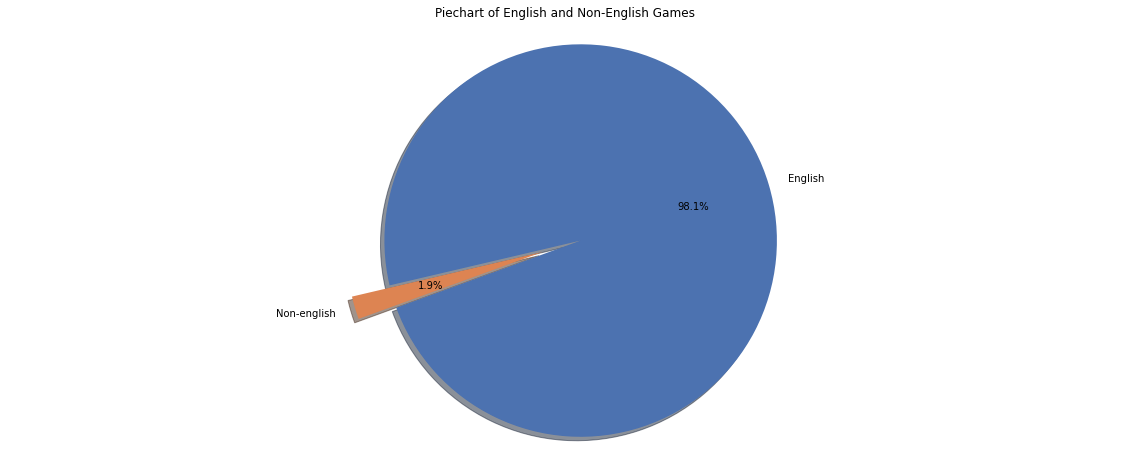

In [10]:
# Creating Plot piechart of English and Non-English games
english_dict = dict(df.english.value_counts())
labels = 'English', 'Non-english'
sizes = [english_dict[1], english_dict[0]]
explode = (0, 0.2)

with sns.color_palette("deep"):
    plt.pie(sizes, explode=explode, labels=labels,
    autopct='%1.1f%%', shadow=True, startangle=200)

# Plot title
plt.axis('equal')
plt.title('Piechart of English and Non-English Games')
plt.show()

**Required Age**

Apparently not all games are for all ages. So we have to see the difference here.

In [11]:
# Grouping Games "Not for all Ages"
df.groupby('not_for_all_ages').size()

not_for_all_ages
False    26479
True       596
dtype: int64

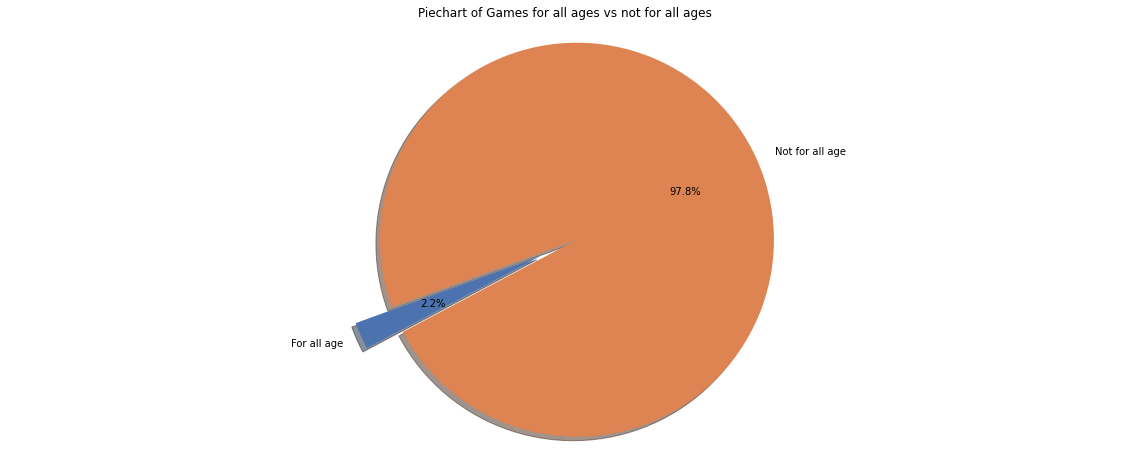

In [12]:
# Creating Plot piechart of games for all ages vs not for all ages
not_all_age_dict = dict(df.not_for_all_ages.value_counts())
labels = 'For all age', 'Not for all age'
sizes = [not_all_age_dict[1], not_all_age_dict[0]]
explode = (0, 0.2) 

# Plot Age rate
with sns.color_palette("deep"):
    plt.pie(sizes, explode=explode, labels=labels,
    autopct='%1.1f%%', shadow=True, startangle=200)

# Plot title
plt.axis('equal')
plt.title('Piechart of Games for all ages vs not for all ages')
plt.show()

Most of the market target on Steam are people **above 18 years old**. This can also influence the **content of the game** itself. So, it is important to research new insight what makes people above 18 years old play and buy more games than the other ages.

In [13]:
# Grouping Required Ages distribution
df.required_age.value_counts()

0     26479
18      308
16      192
12       73
7        12
3        11
Name: required_age, dtype: int64

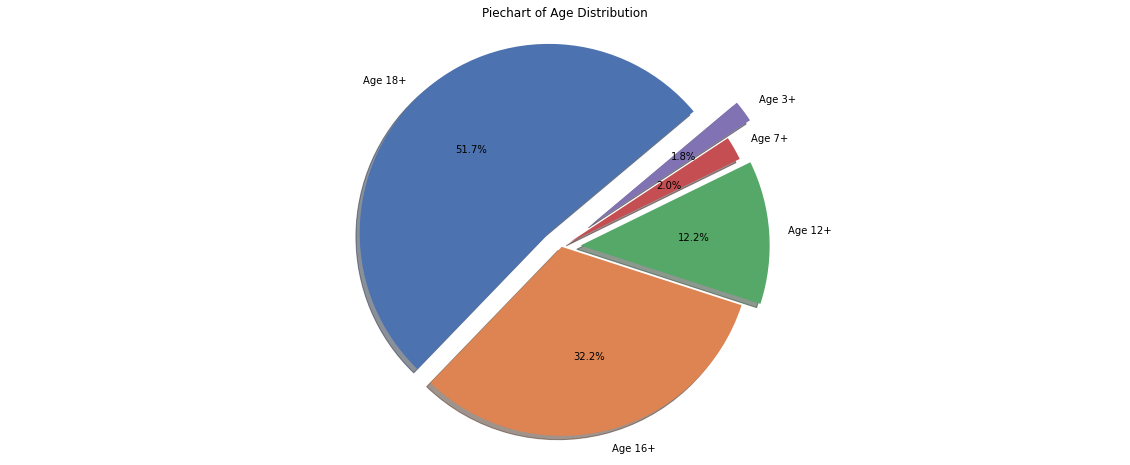

In [14]:
# Creating Plot piechart of Required Age Distribution
age_dict = dict(df.required_age.value_counts())
labels = 'Age 18+', 'Age 16+', 'Age 12+', 'Age 7+', 'Age 3+'
sizes = [age_dict[18], age_dict[16], age_dict[12], age_dict[7], age_dict[3]]
explode = (0.1, 0, 0.1, 0.05, 0.2) 

# Plot Age distribution
with sns.color_palette("deep"):
    plt.pie(sizes, explode=explode, labels=labels,
    autopct='%1.1f%%', shadow=True, startangle=40)

# Plot title
plt.axis('equal')
plt.title('Piechart of Age Distribution')
plt.show()

**Achievements**

Surprisingly, more than half of the overall games have achievements. This can be a sign that **the competition for game markets is a bit strong** especially **to gain a better branding** for games.

In [15]:
# Grouping achievement rate
df.groupby(['games_with_achievements']).size()

games_with_achievements
False    11864
True     15211
dtype: int64

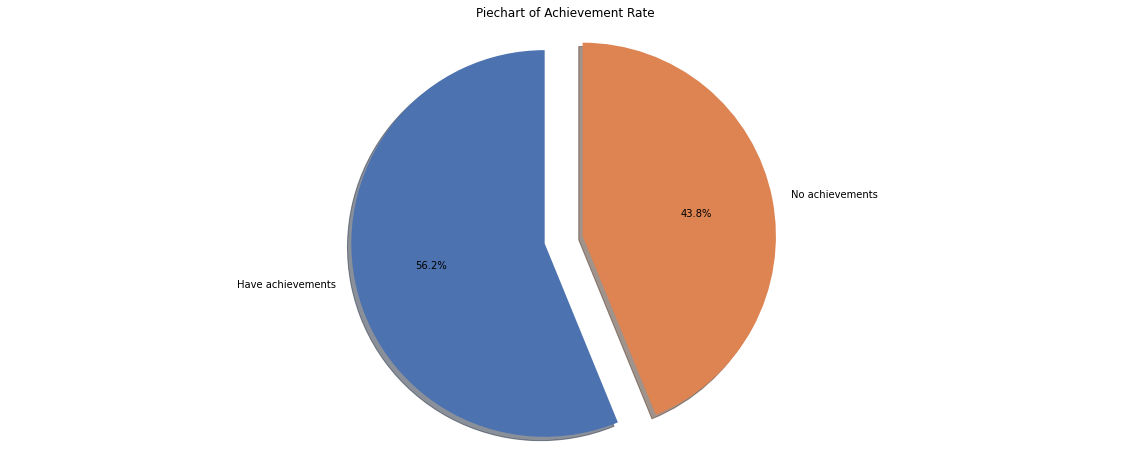

In [16]:
# Creating Plot piechart of games with achievement rate
achievment_dict = dict(df.games_with_achievements.value_counts())
labels = 'Have achievements', 'No achievements'
sizes = [achievment_dict[1], achievment_dict[0]]
explode = (0, 0.2)

# Plot Achievement rate
with sns.color_palette("deep"):
    plt.pie(sizes, explode=explode, labels=labels,
    autopct='%1.1f%%', shadow=True, startangle=90)

# Plot title
plt.axis('equal')
plt.title('Piechart of Achievement Rate')
plt.show()

**Free-Games vs Paid-Games**

It can be seen that 90% of games on Steam are paid games. It means, Steam is a marketplace for game sellings.

In [17]:
# Grouping free-to-play Games
df.groupby(['free_to_play']).size()

free_to_play
False    24515
True      2560
dtype: int64

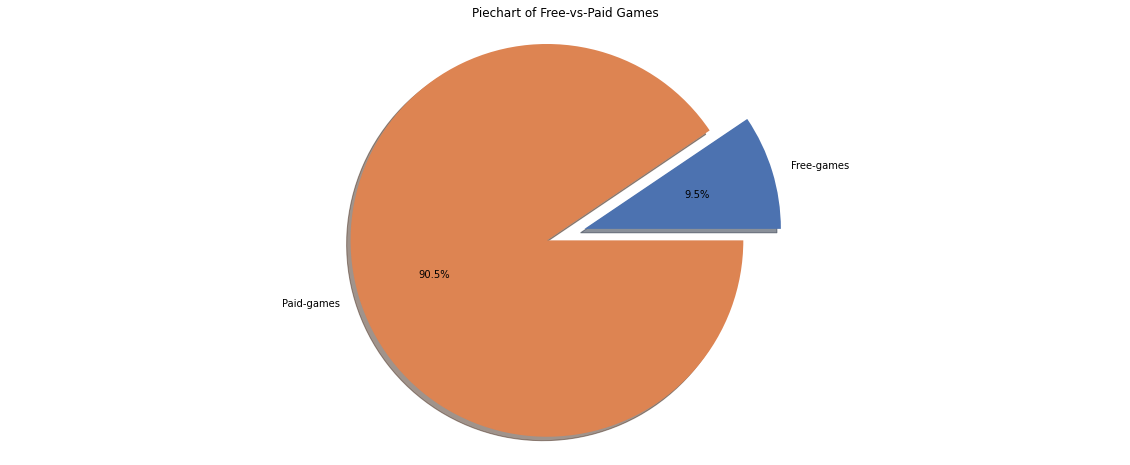

In [18]:
# Creating Plot piechart of games with achievement rate
freegames_dict = dict(df.free_to_play.value_counts())
labels = 'Free-games', 'Paid-games'
sizes = [freegames_dict[1], freegames_dict[0]]
explode = (0, 0.2)

# Showing plot
with sns.color_palette("deep"):
    plt.pie(sizes, explode=explode, labels=labels,
    autopct='%1.1f%%', shadow=True, startangle=0)

# Plot title
plt.axis('equal')
plt.title('Piechart of Free-vs-Paid Games')
plt.show()

#### **4. Released Date**

This will be further explained on part 6 "Games Released Before and After 2006".

In [19]:
df['release_date'] = pd.to_datetime(df['release_date'])
year = df['release_date'].dt.year

In [20]:
df['release_date'].dt.year.value_counts().sort_values(ascending=False)

2018    8160
2017    6357
2016    4361
2015    2597
2019    2213
2014    1555
2013     418
2012     320
2009     305
2011     239
2010     238
2008     145
2007      93
2006      48
2005       6
2004       6
2001       4
2003       3
2000       2
1999       2
2002       1
1998       1
1997       1
Name: release_date, dtype: int64

#### **5. Genres, categories, and platforms**

**Genres**

We can see more than 70% of games are `indie` games. Which means many developers and publishers are still doing trial-and-error in selling their games on Steam. This means, Steam is a good place to start new games even **for small game developers/publishers**.

In [21]:
genres = client.query('''
SELECT
	appid,
	release_date,
	EXTRACT(year FROM release_date) AS year,
	genre_main, genre_2, genre_3, genre_4, genre_5
FROM (SELECT DISTINCT
				appid,
				release_date,
				genres,
				SPLIT(genres, ';')[SAFE_OFFSET(0)] AS genre_main,
				SPLIT(genres, ';')[SAFE_OFFSET(1)] AS genre_2,
				SPLIT(genres, ';')[SAFE_OFFSET(2)] AS genre_3,
				SPLIT(genres, ';')[SAFE_OFFSET(3)] AS genre_4,
				SPLIT(genres, ';')[SAFE_OFFSET(4)] AS genre_5,
			FROM `hacktiv8-016-nadiaoktiarsy.steam.steam_general_data`)
GROUP BY appid, release_date, genre_main, genre_2, genre_3,genre_4, genre_5
ORDER BY release_date ASC;
''').to_dataframe()

genres

,appid,release_date,year,genre_main,genre_2,genre_3,genre_4,genre_5
0,282010,1997-06-30,1997,Action,Indie,Racing,None,None
1,70,1998-11-08,1998,Action,None,None,None,None
2,20,1999-04-01,1999,Action,None,None,None,None
3,50,1999-11-01,1999,Action,None,None,None,None
4,10,2000-11-01,2000,Action,None,None,None,None
...,...,...,...,...,...,...,...,...
27070,1062240,2019-04-25,2019,Action,Adventure,Indie,RPG,None
27071,1031920,2019-04-25,2019,Simulation,None,None,None,None
27072,718590,2019-04-25,2019,Action,Adventure,Indie,RPG,None
27073,931690,2019-04-26,2019,Adventure,Casual,Free to Play,Indie,None


Making a bar chart of genres on Steam through pandas. The diagram shows that Indie game is the highest genre being published on Steam.

In [22]:
set_genres = set()
for i in df.genres.str.split(';'):
    set_genres.update(i)

In [23]:
d = dict()
sets_genre = df.genres.str.split(';').apply(set)
for genre in set_genres:
    d[genre] = sets_genre.apply(lambda row: genre in row)
df = df.assign(**d)

Text(0.5, 1.0, 'Percentage of genres')

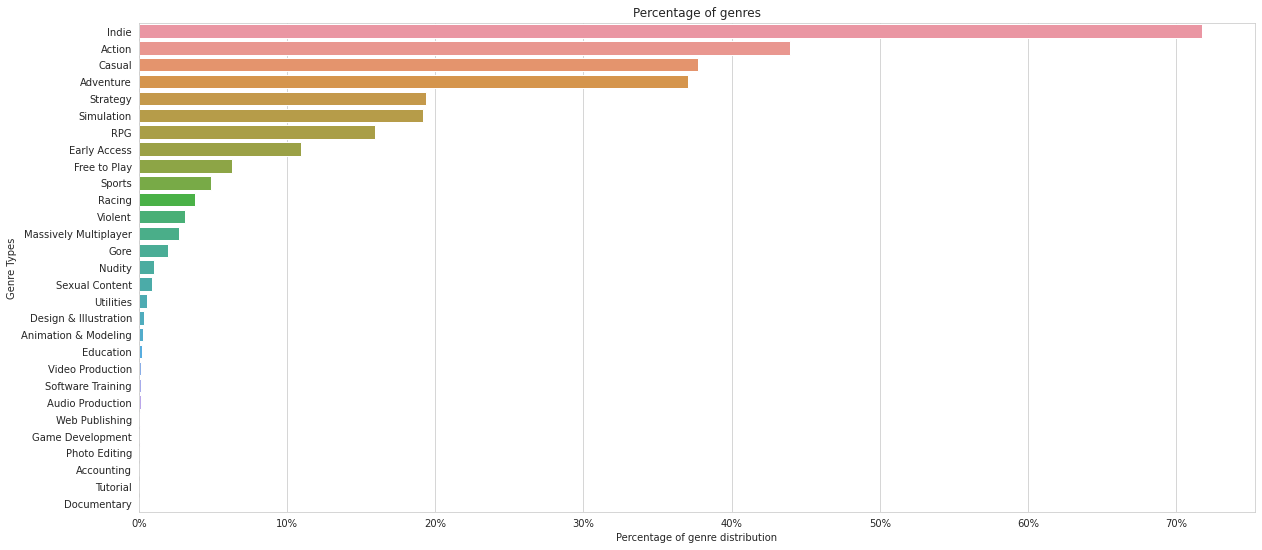

In [24]:
count_genres = df[set_genres].sum()
count_genres = count_genres.sort_values(ascending=False)

plt.figure(figsize=(20,9))
sns.set_style("whitegrid")
g = sns.barplot(y=count_genres.index, x=count_genres/len(df))

vals = g.get_xticks()
g.set_xticklabels(['{:,.0%}'.format(x) for x in vals])

# plt.xlabel('Percents of games that support platform')
plt.ylabel('Genre Types')
plt.xlabel('Percentage of genre distribution')
g.set_title("Percentage of genres")

**Categories**

Single-player places the highest in the game categories. This means, players are either **interested in single-players** or there are many **developers/publishers prefer to sell single-player games**.

In [25]:
client.query('''
SELECT DISTINCT
	appid,
	release_date,
	EXTRACT(year FROM release_date) AS year,
	categories_main, categories_2, categories_3, categories_4, categories_5
FROM (SELECT DISTINCT
        appid,
        release_date,
        categories,
        SPLIT(categories, ';')[SAFE_OFFSET(0)] AS categories_main,
        SPLIT(categories, ';')[SAFE_OFFSET(1)] AS categories_2,
        SPLIT(categories, ';')[SAFE_OFFSET(2)] AS categories_3,
        SPLIT(categories, ';')[SAFE_OFFSET(3)] AS categories_4,
        SPLIT(categories, ';')[SAFE_OFFSET(4)] AS categories_5,
      FROM `hacktiv8-016-nadiaoktiarsy.steam.steam_general_data`)
GROUP BY appid, release_date, categories_main, categories_2, categories_3, categories_4, categories_5
ORDER BY release_date DESC;
''').to_dataframe()

,appid,release_date,year,categories_main,categories_2,categories_3,categories_4,categories_5
0,905370,2019-05-01,2019,Online Multi-Player,MMO,Online Co-op,In-App Purchases,None
1,931690,2019-04-26,2019,Single-player,Steam Achievements,Partial Controller Support,Stats,None
2,706990,2019-04-25,2019,Online Multi-Player,In-App Purchases,None,None,None
3,684580,2019-04-25,2019,Single-player,Online Multi-Player,Online Co-op,Steam Achievements,Steam Trading Cards
4,995050,2019-04-25,2019,Multi-player,Online Multi-Player,Local Multi-Player,Shared/Split Screen,Partial Controller Support
...,...,...,...,...,...,...,...,...
27070,60,2000-11-01,2000,Multi-player,Online Multi-Player,Valve Anti-Cheat enabled,None,None
27071,50,1999-11-01,1999,Single-player,Multi-player,Valve Anti-Cheat enabled,None,None
27072,20,1999-04-01,1999,Multi-player,Online Multi-Player,Local Multi-Player,Valve Anti-Cheat enabled,None
27073,70,1998-11-08,1998,Single-player,Multi-player,Online Multi-Player,Steam Cloud,Valve Anti-Cheat enabled


Making a bar chart of categories available on Steam through pandas

In [26]:
set_categories = set()
for i in df.categories.str.split(';'):
    set_categories.update(i)

In [27]:
d = dict()
sets_category = df.categories.str.split(';').apply(set)
for category in set_categories:
    d[category] = sets_category.apply(lambda row: category in row)
df = df.assign(**d)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Percentage of categories')

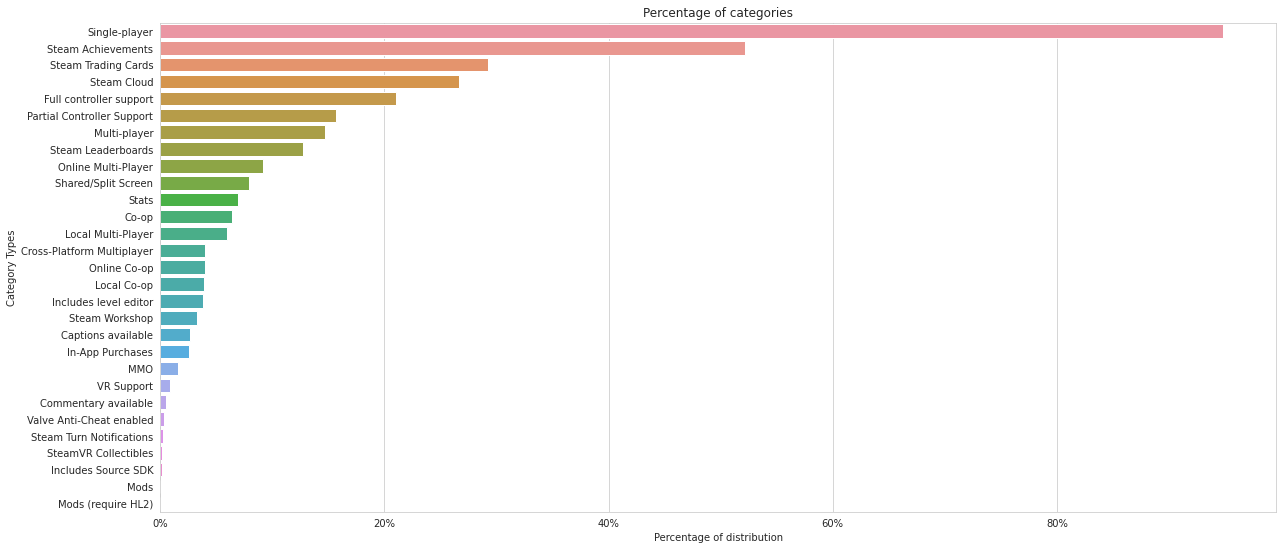

In [28]:
count_category = df[df.columns & set_categories].sum()
count_category = count_category.sort_values(ascending=False)

plt.figure(figsize=(20,9))
g = sns.barplot(y=count_category.index, x=count_category/len(df))

vals = g.get_xticks()
g.set_xticklabels(['{:,.0%}'.format(x) for x in vals])

# plt.xlabel('Percents of games that support platform')
plt.ylabel('Category Types')
plt.xlabel('Percentage of distribution')
g.set_title("Percentage of categories")

**Platforms**

Platforms compatibility is important to consider because Steam is a PC games distributor rather than console games, unlike XboX, Nintento, or PlayStation. Apparently 100% Steam games are compatible for Windows. So it is not really suggested to provide for mac or linux, especially to reduce cost production.

In [29]:
platforms = client.query('''
SELECT DISTINCT
	appid,
	release_date,
	EXTRACT(year FROM release_date) AS year,
	main_platform, alternative_platform, alternative_platform_2
FROM (SELECT DISTINCT
				appid,
				release_date,
				platforms,
				SPLIT(platforms, ';')[SAFE_OFFSET(0)] AS main_platform,
				SPLIT(platforms, ';')[SAFE_OFFSET(1)] AS alternative_platform,
				SPLIT(platforms, ';')[SAFE_OFFSET(2)] AS alternative_platform_2,
			FROM `hacktiv8-016-nadiaoktiarsy.steam.steam_general_data`)
GROUP BY appid, release_date, main_platform, alternative_platform, alternative_platform_2
ORDER BY appid, release_date ASC;
''').to_dataframe()

platforms

,appid,release_date,year,main_platform,alternative_platform,alternative_platform_2
0,10,2000-11-01,2000,windows,mac,linux
1,20,1999-04-01,1999,windows,mac,linux
2,30,2003-05-01,2003,windows,mac,linux
3,40,2001-06-01,2001,windows,mac,linux
4,50,1999-11-01,1999,windows,mac,linux
...,...,...,...,...,...,...
27070,1065230,2019-04-24,2019,windows,None,None
27071,1065570,2019-04-23,2019,windows,None,None
27072,1065650,2019-04-24,2019,windows,None,None
27073,1066700,2019-04-17,2019,windows,mac,None


Making a bar chart of platforms through pandas and percentage of platforms compatibility.

In [30]:
# Setting and spliting the platforms types
set_platform = set()
for i in df.platforms.str.split(';'):
    set_platform.update(i)
set_platform

{'linux', 'mac', 'windows'}

In [31]:
# Input set_platform into dictionary
sets_platforms = df.platforms.str.split(';').apply(set)
d = dict()
d['windows'] = sets_platforms.apply(lambda row: 'windows' in row)
d['linux'] = sets_platforms.apply(lambda row: 'linux' in row)
d['mac'] = sets_platforms.apply(lambda row: 'mac' in row)
df = df.assign(**d)

In [32]:
# Counting each platforms used on Steam
pd.options.display.float_format = '{:.5f}'.format
count_platforms = df[df.columns & set_platform].sum()
count_platforms = count_platforms.sort_values(ascending=False)
count_platforms/len(df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  This is separate from the ipykernel package so we can avoid doing imports until


windows   0.99982
mac       0.29791
linux     0.19335
dtype: float64

Text(0.5, 1.0, 'Percentage of Platforms Compatibility')

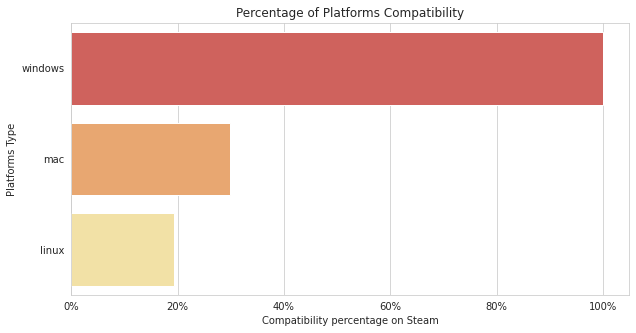

In [33]:
# Plot the barchart of platforms compatibility on Steam
plt.figure(figsize=(10,5))

with sns.color_palette("Spectral"):
    g = sns.barplot(y=count_platforms.index, x=count_platforms / len(df))

vals = g.get_xticks()
g.set_xticklabels(['{:,.0%}'.format(x) for x in vals])

# plt.xlabel('Percents of platforms compatibility')
plt.ylabel('Platforms Type')
plt.xlabel('Compatibility percentage on Steam')
g.set_title("Percentage of Platforms Compatibility")

**4. Owners**

Owners refer to number of players who have purchased the game. We can see from the table below that there are only `2 games` with the highest players who purchased the game, which is more than `50 million`. Yes, this is possible especially for the game that was released since years ago. This will be useful as a reference for how long the game will be staying alive.

In [34]:
client.query('''
SELECT
	owners,
  COUNT(owners) AS number_of_games,
FROM `hacktiv8-016-nadiaoktiarsy.steam.steam_general_data`
GROUP BY owners
ORDER BY owners DESC
''').to_dataframe()

,owners,number_of_games
0,50000000-100000000,2
1,5000000-10000000,46
2,500000-1000000,513
3,50000-100000,1695
4,20000000-50000000,3
5,2000000-5000000,193
6,200000-500000,1272
7,20000-50000,3059
8,100000000-200000000,1
9,10000000-20000000,21


In [35]:
mask = df.owners.isin(['10000000-20000000', '20000000-50000000', '50000000-100000000', '100000000-200000000'])
df.loc[mask, 'owners'] = '10mil and more'

In [36]:
df.loc[df.owners == '5000000-10000000', 'owners'] = '5mil-10mil'
df.loc[df.owners == '2000000-5000000', 'owners'] = '2mil-5mil'
df.loc[df.owners == '1000000-2000000', 'owners'] = '1mil-2mil'
df.loc[df.owners == '500000-1000000', 'owners'] = '500k-1mil'
df.loc[df.owners == '200000-500000', 'owners'] = '200k-500k'
df.loc[df.owners == '100000-200000', 'owners'] = '100k-200k'
df.loc[df.owners == '50000-100000', 'owners'] = '50k-100k'
df.loc[df.owners == '20000-50000', 'owners'] = '20k-50k'
df.loc[df.owners == '0-20000', 'owners'] = '20k or less'

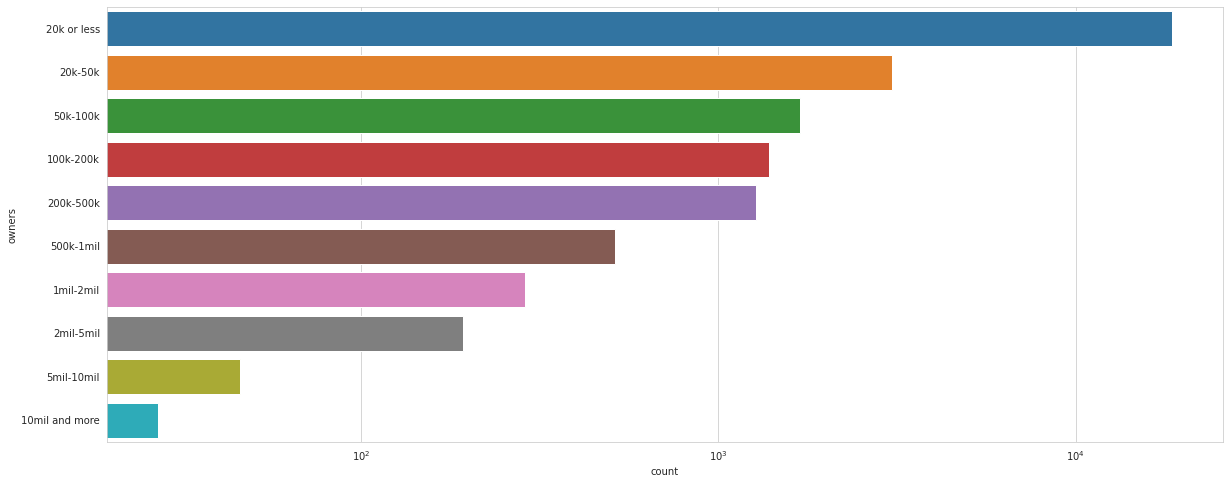

In [37]:
plt.figure(figsize=(20,8))
g = sns.countplot(data=df, y='owners', order=df.owners.value_counts().index)
g.set_xscale('log')

## **5. Data Cleaning**

The data cleaning will be based on price, since it will be further reviewed for its significance.

There are two histograms that tell us about the number of price on Steam. The first one is the general distribution of overall price. Meanwhile the second histogram tells us about the random sample `400 random samples` to test the hypothesis, and then we try to see the visualization which shows that the distribution and random sample are basically the same.

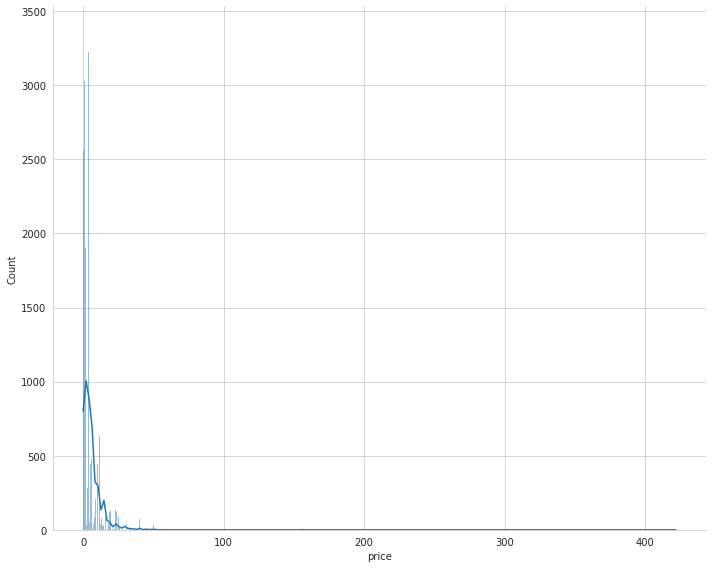

In [38]:
sns.displot(df.price, kde=True, label='Price on Steam', height=8, aspect=10/8)

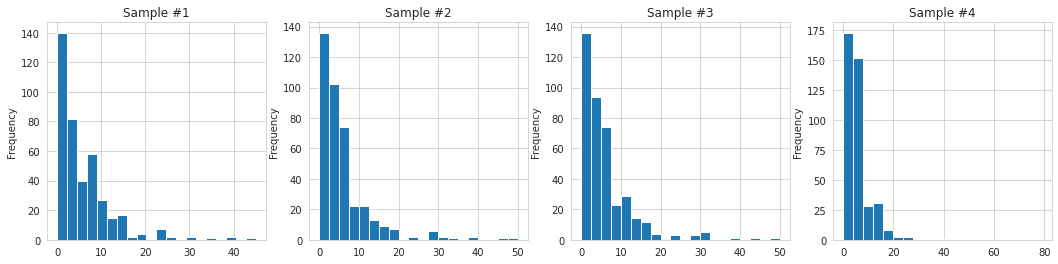

In [39]:
fig,ax = plt.subplots(ncols=4, figsize = (18,4))
for i in range(4):
  df.price.sample(400).plot(kind='hist',bins=20,ax=ax[i])
  ax[i].set_title('Sample #{}'.format(i+1))

### **5.1. Handling Missing Value**

Missing value is not available from the raw dataset itself. This dataset does not need to change its content, because the value 0 in the dataset means literally 0 here, and it does not mean `null` or missing values.


In [40]:
df = pd.read_csv(url)
df.isnull().sum()

appid               0
name                0
release_date        0
english             0
developer           0
publisher           0
platforms           0
required_age        0
categories          0
genres              0
steamspy_tags       0
achievements        0
positive_ratings    0
negative_ratings    0
average_playtime    0
median_playtime     0
owners              0
price               0
dtype: int64

In [41]:
# Checking if 'appid' just contains ID numbers
df['appid'].sample()

13900    610730
Name: appid, dtype: int64

### **5.2. Skewness**

Skewnesss refers to a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution, in a set of data. The skeweness based on data `price` can be categorized as `right skewed` with results of skewness: `11.73`, which means the dataset skew more than 50% (or >0.5). Moreover, because of the skewness is more than 1, then the outlier calculation will be using `3 standard deviation`. Meanwhile, 1.5IQR is only used when skewness is between 0.5 and 1.

In [42]:
# Creating a function to print the skewness
def print_skewness(data):
    print(f'\'{data.name}\' skewness: {data.skew()}')
    # print(f'\'{data.name}\'kurtosis: {data.kurt()}')
    if data.skew() > 0.5:
        print ('Right skewed')
    elif data.skew() < -0.5:
        print( 'Left Skewed')
    else:
        print("Normal Distribution")

In [43]:
# Creating a function to visualize the data
def visualize_data(data):
    print_skewness(data)
    plt.hist(data, bins=150, rwidth=1, density=True)
    plt.xlabel(f'{data.name}')
    plt.ylabel('Probability Density')
    rng = np.arange(data.min(), data.max(), 0.1)
    plt.plot(rng, norm.pdf(rng,data.mean(),data.std()))

    # label the plot
    plt.legend(['Normal PDF(Probability Density Function) ', 'Histogram: Load Weight'])
    plt.axvline(data.mean(), color='magenta', linestyle='dashed', linewidth=2)
    plt.axvline(data.median(), color='green', linestyle='dashed', linewidth=2)
    plt.axvline(data.mode()[0], color='red', linestyle='dashed', linewidth=2)
    plt.show()

'price' skewness: 11.732950829962958
Right skewed


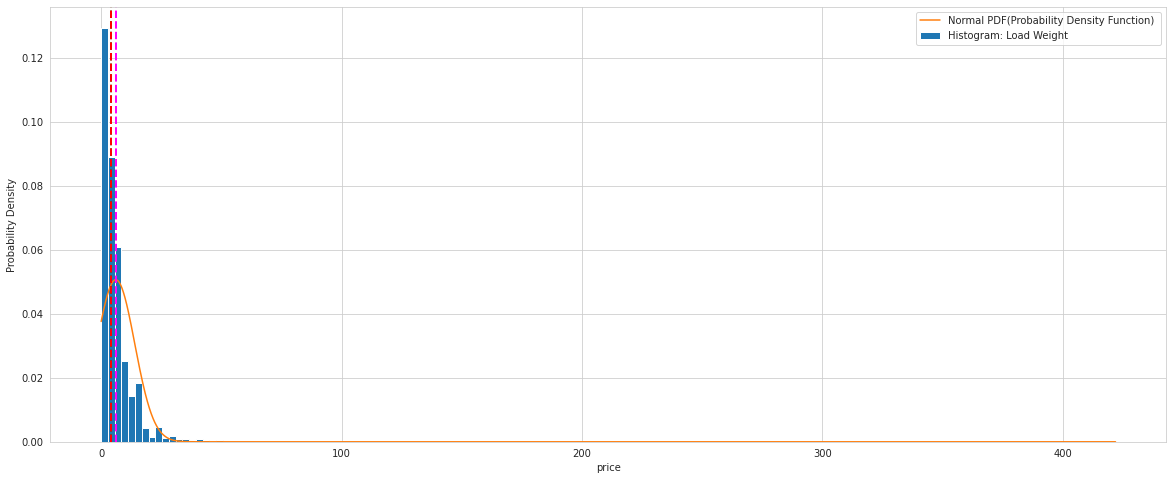

In [44]:
# Visualizing skewed data, question: is checking 
visualize_data(df.price)

### **5.3. Outliers**


In [45]:
df.describe()

,appid,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price
count,27075.00000,27075.00000,27075.00000,27075.00000,27075.00000,27075.00000,27075.00000,27075.00000,27075.00000
mean,596203.50866,0.98113,0.35490,45.24886,1000.55852,211.02715,149.80495,146.05603,6.07819
std,250894.16725,0.13608,2.40604,352.67028,18988.72444,4284.93853,1827.03814,2353.88008,7.87492
min,10.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,401230.00000,1.00000,0.00000,0.00000,6.00000,2.00000,0.00000,0.00000,1.69000
50%,599070.00000,1.00000,0.00000,7.00000,24.00000,9.00000,0.00000,0.00000,3.99000
75%,798760.00000,1.00000,0.00000,23.00000,126.00000,42.00000,0.00000,0.00000,7.19000
max,1069460.00000,1.00000,18.00000,9821.00000,2644404.00000,487076.00000,190625.00000,190625.00000,421.99000


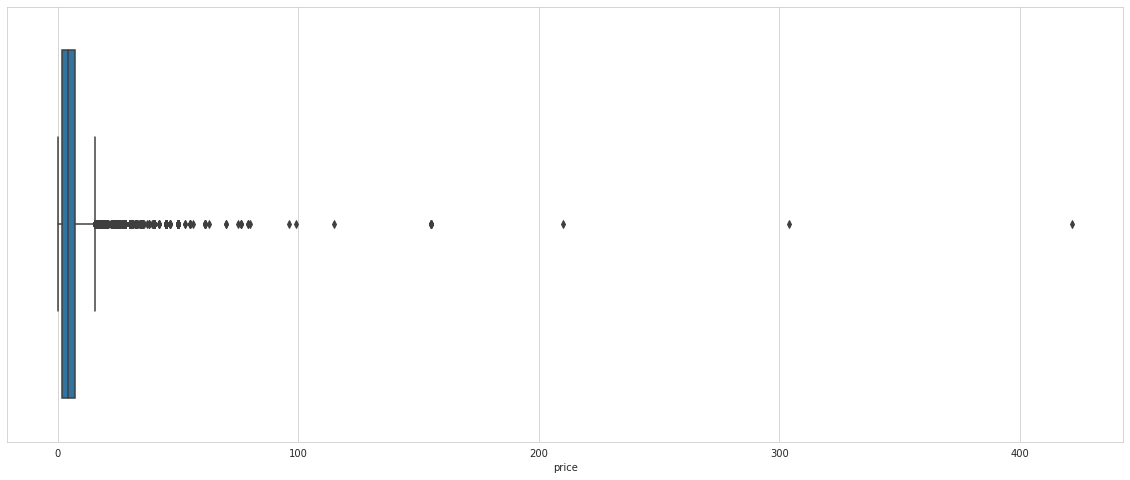

In [46]:
# Checking outliers, with the maximum extreme value 245440
sns.boxplot(x = df['price'])
plt.show()

**Handling Outliers:**\
There are three methods for handling outliers. However, in this case, the outlier will be detected and removed by using the first method, which is using 3 standard deviation because `price` skewness: `11.73`, or **Right Skeweed**, so that is the reason why we will use outter fence or 3 standard deviation because of the extremeness of the skewness.

In [47]:
# Outliers detection and removal using 3 standards deviation
df['price']

0       7.19000
1       3.99000
2       3.99000
3       3.99000
4       3.99000
          ...  
27070   2.09000
27071   1.69000
27072   3.99000
27073   5.19000
27074   5.19000
Name: price, Length: 27075, dtype: float64

In [48]:
df['price'].var()

62.014400827721644

In [49]:
df['price'].std()

7.8749222743924046

In [50]:
# Calculating Upper Limit Fence
upper_limit = df.price.mean() + 1.5*df.price.std()
upper_limit

17.890576578716956

In [51]:
# Calculating Lower Limit Fence
lower_limit = df.price.mean() - 1.5*df.price.std()
lower_limit

-5.734190244460259

In [52]:
# outliers which are outside the 3 std
df[(df.price>upper_limit) | (df.price<lower_limit)]

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
34,1600,Dangerous Waters,2006-02-07,1,Sonalysts,Strategy First,windows,0,Single-player;Multi-player,Strategy,Strategy;Simulation;Naval,0,140,44,0,0,50000-100000,22.99000
77,2870,X Rebirth,2013-11-15,1,Egosoft,Egosoft,windows;mac;linux,0,Single-player;Steam Achievements;Full controll...,Action;Simulation,Space;Simulation;Sci-fi,69,2832,4032,1744,3386,200000-500000,24.99000
78,2900,688(I) Hunter/Killer,2006-10-26,1,Sonalysts,Strategy First,windows,0,Single-player;Multi-player,Strategy,Strategy;Simulation;Naval,0,52,17,0,0,20000-50000,22.99000
79,2910,Fleet Command,2006-10-26,1,Sonalysts,Strategy First,windows,0,Single-player,Strategy,Strategy;Simulation;Naval,0,127,31,0,0,50000-100000,22.99000
80,2920,Sub Command,2006-10-26,1,Sonalysts,Strategy First,windows,0,Single-player;Multi-player;Co-op;Includes leve...,Strategy,Strategy;Simulation;Naval,0,33,14,0,0,20000-50000,22.99000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26653,1029630,Power & Revolution 2019 Edition,2019-03-12,1,Eversim,Eversim,windows,0,Single-player;Steam Achievements,Simulation;Strategy,Strategy;Simulation;Politics,71,50,63,0,0,0-20000,39.99000
26680,1031440,TOKYO CHRONOS,2019-03-19,1,MyDearest Inc.,Sekai Project,windows,0,Single-player;Steam Achievements;Steam Trading...,Adventure;Simulation,Adventure;Simulation;Violent,23,55,2,0,0,0-20000,30.99000
26704,1032430,Blood Trail,2019-03-27,1,Electrovore,Electrovore,windows,0,Single-player,Action;Early Access,Early Access;Gore;Violent,0,197,76,0,0,0-20000,19.49000
26827,1041270,Exogenesis ~Perils of Rebirth~,2019-04-19,1,Kwan,Sekai Project,windows,0,Single-player,Action;Adventure;Casual;Indie;Early Access,Early Access;Adventure;Indie,0,1,0,0,0,0-20000,23.79000


There are `1325 games` that the price is included as outliers or extreme values. So, we need to check the real average price, and apparently the average price is **from 2 to 7.5 poundsterling**, based on the boxplot below.

In [53]:
# removing outlier and checking its head()
df_no_outlier_std_dev = df[(df.price<upper_limit) & (df.price>lower_limit)]

In [54]:
# Chekcing df after removing outliers
df_no_outlier_std_dev.shape

(25750, 18)

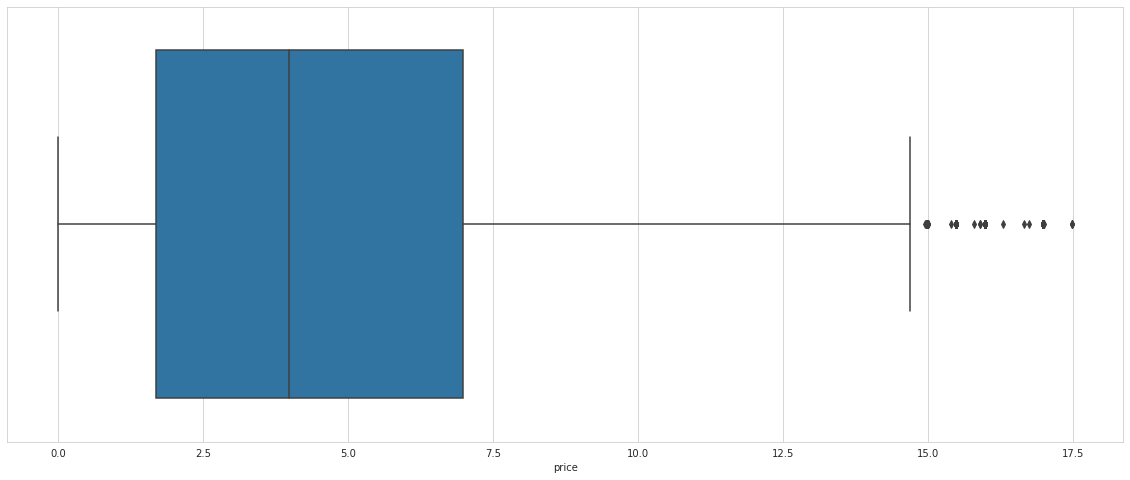

In [55]:
# Checking outliers at boxplot below
sns.boxplot(x = df_no_outlier_std_dev['price'])
plt.show()

In [56]:
# Renaming long dataframe name with the short one, and checking the central tendency
df_steam = df_no_outlier_std_dev

In [57]:
df1 = df_steam["owners"].str.split("-",expand=True)
df1 = df1.astype(int)
df1.set_axis(['minimum_players', 'maximum_players'], axis='columns', inplace=True)

In [58]:
df_steam = pd.concat([df_steam, df1], axis=1)
df_steam

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,minimum_players,maximum_players
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19000,10000000,20000000
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99000,5000000,10000000
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99000,5000000,10000000
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99000,5000000,10000000
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99000,5000000,10000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27070,1065230,Room of Pandora,2019-04-24,1,SHEN JIAWEI,SHEN JIAWEI,windows,0,Single-player;Steam Achievements,Adventure;Casual;Indie,Adventure;Indie;Casual,7,3,0,0,0,0-20000,2.09000,0,20000
27071,1065570,Cyber Gun,2019-04-23,1,Semyon Maximov,BekkerDev Studio,windows,0,Single-player,Action;Adventure;Indie,Action;Indie;Adventure,0,8,1,0,0,0-20000,1.69000,0,20000
27072,1065650,Super Star Blast,2019-04-24,1,EntwicklerX,EntwicklerX,windows,0,Single-player;Multi-player;Co-op;Shared/Split ...,Action;Casual;Indie,Action;Indie;Casual,24,0,1,0,0,0-20000,3.99000,0,20000
27073,1066700,New Yankee 7: Deer Hunters,2019-04-17,1,Yustas Game Studio,Alawar Entertainment,windows;mac,0,Single-player;Steam Cloud,Adventure;Casual;Indie,Indie;Casual;Adventure,0,2,0,0,0,0-20000,5.19000,0,20000


After we removed the extreme values, now we have `25,750` games that should be analyzed later.

In [59]:
round(df_steam.describe(), 2)

,appid,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price,minimum_players,maximum_players
count,25750.00000,25750.00000,25750.00000,25750.00000,25750.00000,25750.00000,25750.00000,25750.00000,25750.00000,25750.00000,25750.00000
mean,600313.80000,0.98000,0.29000,45.81000,796.27000,141.70000,122.79000,120.35000,4.91000,70784.08000,168346.02000
std,251244.30000,0.13000,2.16000,361.45000,18803.50000,2883.32000,1760.33000,2290.34000,4.16000,823368.03000,1693193.27000
min,10.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,20000.00000
25%,405912.50000,1.00000,0.00000,0.00000,6.00000,2.00000,0.00000,0.00000,1.69000,0.00000,20000.00000
50%,604935.00000,1.00000,0.00000,6.00000,22.00000,8.00000,0.00000,0.00000,3.99000,0.00000,20000.00000
75%,802927.50000,1.00000,0.00000,21.00000,106.00000,36.00000,0.00000,0.00000,6.99000,20000.00000,50000.00000
max,1069460.00000,1.00000,18.00000,9821.00000,2644404.00000,402313.00000,190625.00000,190625.00000,17.49000,100000000.00000,200000000.00000


In [60]:
## DOWNLOADING CSV CLEAN FILES FOR TABLEAU ##
# from google.colab import files
# df_steam.to_csv(r'C:\Users\Okti\OneDrive\Desktop\steam_clean.csv')
# files.download(r'C:\Users\Okti\OneDrive\Desktop\steam_clean.csv')

## **6. Data Analysis**

There are 2 kinds of main data analysis: Descriptive Statistics and Inferential Statistics.

1. **Descriptive statistics** will be explain further on `Platform Preference`, `Games Released Before and After 2006`, and `Reviewing Price based on Developers Aggregate`.
2. **Inferential statistics** is to understand the probability of sale, what the relationship between `users with price`, and `users with game features` (genres, categories, and platforms).

#### **Platforms Preference**

The recommended platform that is compatible on Steam is `windows`, although there are many games that provide for all of them. If we want to sell the game on other platforms (such as `mac` and `linux`), it is suggested to mention on the product's name (or game). For example, "Call of Duty - Mac Edition" as an example of a big game with owners between `50000-100000` and price is `£15.5`.

In [61]:
# Platforms
df_steam.platforms.value_counts()

windows              17409
windows;mac;linux     4418
windows;mac           3324
windows;linux          594
mac                      3
mac;linux                1
linux                    1
Name: platforms, dtype: int64

The data loading on part 4 mentions that most Steam games are for window which the rate is 99% for windows. However, apparently the platform counts there are some games only for `mac`, `linux`, and `mac-linux`. So we can check here what game titles without `windows`:

In [62]:
platform_columns = ['platforms', 'name', 'release_date', 'developer', 'categories', 'genres',
       'average_playtime', 'owners', 'price']

In [63]:
df_steam[df_steam.platforms=='mac'][platform_columns]

,platforms,name,release_date,developer,categories,genres,average_playtime,owners,price
1413,mac,Call of Duty: Black Ops - Mac Edition,2012-09-27,Aspyr,Single-player;Multi-player;Co-op;Steam Achieve...,Action,0,50000-100000,15.49000
12479,mac,Paul Pixel - The Awakening,2017-01-09,Xoron GmbH,Single-player,Adventure;Indie,0,0-20000,2.89000
16662,mac,MobileZombie,2017-10-13,YIMING ZHANG,Single-player;Partial Controller Support,Adventure;Casual;Free to Play;Indie,0,0-20000,0.00000


In [64]:
df_steam[df_steam.platforms=='linux'][platform_columns]

,platforms,name,release_date,developer,categories,genres,average_playtime,owners,price
20530,linux,PICNIC,2018-03-04,A.D. Klumpp,Single-player,Indie,0,0-20000,0.00000


In [65]:
df_steam[df_steam.platforms=='mac;linux'][platform_columns]

,platforms,name,release_date,developer,categories,genres,average_playtime,owners,price
13387,mac;linux,Arma: Cold War Assault Mac/Linux,2017-03-14,Bohemia Interactive,Single-player,Violent;Action;Simulation;Strategy,0,0-20000,3.49000


#### **Games Released Before and After 2006**

Apparently there was a big change after Valve opened Steam to sell games from other publishers. This can be seen by the barchart before 2006, which Valve only sold below 6 games. After 2006, Valve opened Steam to other publisher and it started to grow significantly from 6 to 48. From here, we can see that there is a **tendency of growth every year** for games marketing on Steam.

Text(0, 0.5, 'Total games')

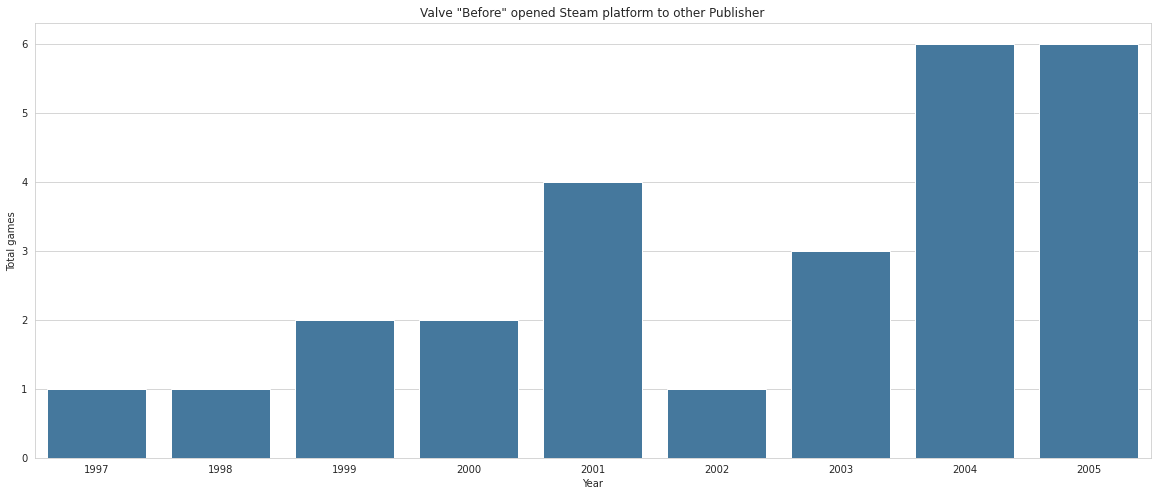

In [66]:
# Before Valve opened Steam platform to other Publisher
df_steam['release_date'] = pd.to_datetime(df_steam['release_date'])
year = df_steam['release_date'].dt.year

yearly = df_steam.groupby(df_steam.release_date.dt.year.rename('release_year'))\
    .agg('count').appid.rename('count')

steam_year = 2006

yearly_part = yearly[yearly.index < steam_year]
sns.barplot(y=yearly_part, x=yearly_part.index, color=default_color)
plt.title(f'Valve "Before" opened Steam platform to other Publisher')
plt.xlabel('Year')
plt.ylabel('Total games')

Text(0, 0.5, 'Total games')

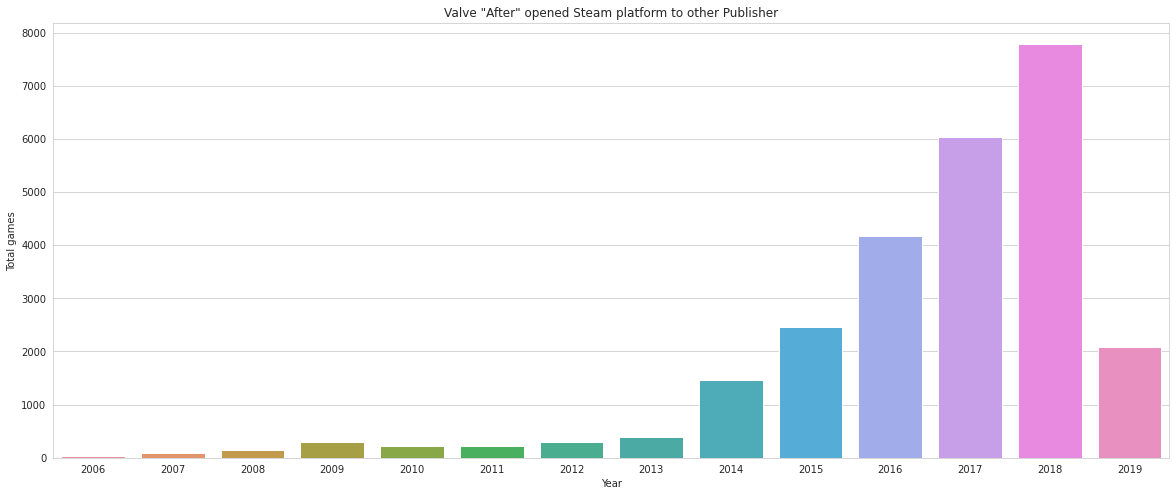

In [67]:
# Released date (year) aggregated by number of games released
yearly_part = yearly[yearly.index >= steam_year]
sns.barplot(y=yearly_part, x=yearly_part.index)
plt.title('Valve "After" opened Steam platform to other Publisher')
plt.xlabel('Year')
plt.ylabel('Total games')

We can also see there is a tendency where Steam users buy games. We can see if There is an increase every March and October, when there is usually **sale and school holiday**. Thus, it is suggested to release the game during **Spring and Fall season** where there is a tendency that people will stay at home and play games.

Text(0, 0.5, 'Release count')

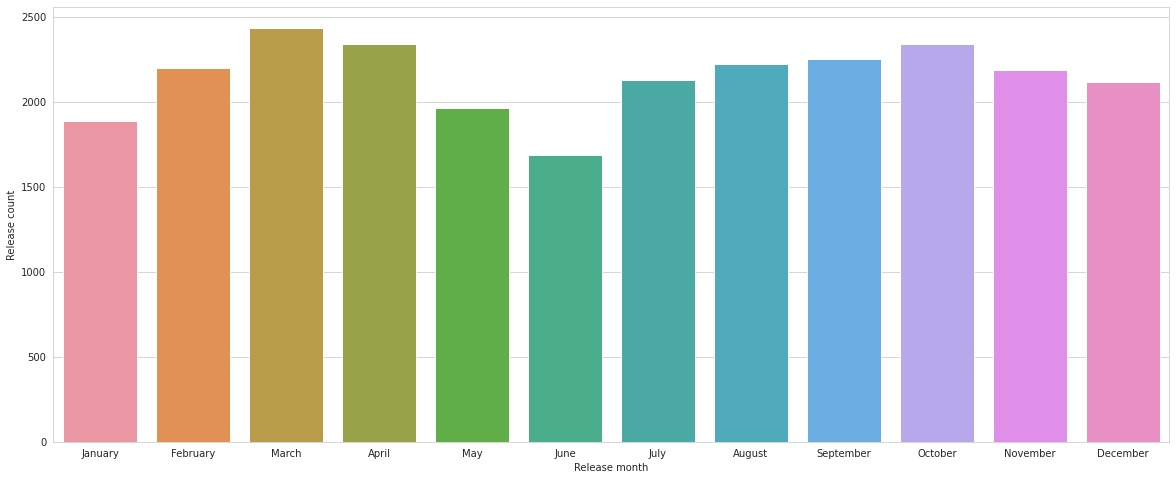

In [68]:
# Discovering the most popular month when games are mostly released
monthly = df_steam.groupby(df_steam.release_date.dt.month.rename('release_month'))\
    .agg('count').appid.rename('count')
monthly

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

g = sns.barplot(x=monthly.index, y=monthly)
g.set_xticklabels(months)
plt.xlabel('Release month')
plt.ylabel('Release count')

#### **Reviewing Price based on Developers Aggregate**

We check the top 30 developers first, and there are actually many developers working for games published on Steam. These developers are not even famous enough for gaming community. We should check it out further.

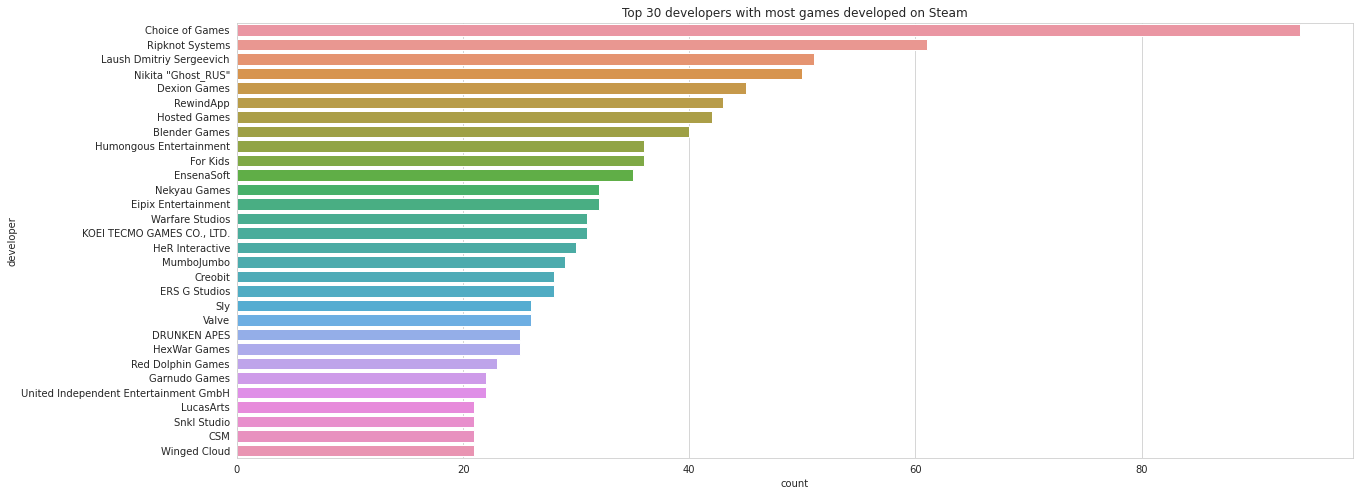

In [69]:
top=30
plt.title(f'Top {top} developers with most games developed on Steam')

sns.countplot(y="developer", data=df_steam,
             order=df_steam.developer.value_counts().iloc[:top].index)

To check the top 30 developers, we also aggregate them with overall reviews, positive rate, and price. However, we can find that the price average from these top 30 developers is low than the overall average price from all games. This means there are **many developers selling their games underpriced**.

In [70]:
# Creating reviews and rating additional data
df_steam = df_steam.assign(**{'overall_reviews': df_steam.positive_ratings + df_steam.negative_ratings})
df_steam = df_steam.assign(**{'positive_rate': df_steam.positive_ratings / df_steam.overall_reviews})

In [71]:
# Creating aggregate for developers with overall reviews and others
agg_developers = df_steam.groupby('developer')\
        .agg({'overall_reviews': ['min', 'max', 'median'],
              'name':'count', 'positive_rate': 'mean', 'price':['mean','median']})

In [74]:
agg_developers \
    [agg_developers.index.isin(df_steam.developer.value_counts().iloc[:30].index)] \
    .sort_values(('name', 'count'), ascending=False)

overall_reviews                       \
                                                  min      max      median   
developer                                                                    
Choice of Games                                     2     1769    14.00000   
Ripknot Systems                                     1       64    19.00000   
Laush Dmitriy Sergeevich                            1       88     9.00000   
Nikita "Ghost_RUS"                                  1      131    23.00000   
Dexion Games                                        1       43    17.00000   
RewindApp                                           3      475    32.00000   
Hosted Games                                        1      250    18.50000   
Blender Games                                       1      379    15.00000   
Humongous Entertainment                            15      594    57.50000   
For Kids                                            2      125    32.00000   
EnsenaSoft                                          2      248    85.00000   
Eipix Entertainment                                 1       10     2.00000   
Nekyau Games                                        1       99    25.00000   
Warfare Studios                                     1      100    21.00000   
KOEI TECMO GAMES CO., LTD.                          1     6107    10.00000   
HeR Interactive                                     5       98    27.00000   
MumboJumbo                                          9      288    66.00000   
ERS G Studios                                       1        7     2.00000   
Creobit                                             1    15104    31.00000   
Sly                                                 1      105     9.00000   
Valve                                            1540  1005586 15396.00000   
HexWar Games                                        1       61    11.00000   
DRUNKEN APES                                        1      411    25.00000   
Red Dolphin Games                                   1       90    19.00000   
Garnudo Games                                       1       25     4.50000   
United Independent Entertainment GmbH               4      946    31.00000   
CSM                                                 4      100    17.00000   
LucasArts                                           4     6771   347.00000   
Snkl Studio                                         3      370    39.00000   
Winged Cloud                                       32    14161   278.00000   

                                       name positive_rate    price          
                                      count          mean     mean  median  
developer                                                                   
Choice of Games                          94       0.71997  3.85170 3.99000  
Ripknot Systems                          61       0.57480  8.43262 9.99000  
Laush Dmitriy Sergeevich                 51       0.66641  1.81941 1.69000  
Nikita "Ghost_RUS"                       50       0.54387  1.17400 0.79000  
Dexion Games                             45       0.29176  0.88556 0.79000  
RewindApp                                43       0.62005  0.95977 0.79000  
Hosted Games                             42       0.72556  3.28524 2.89000  
Blender Games                            40       0.72446  0.79000 0.79000  
Humongous Entertainment                  36       0.86665  4.70667 4.99000  
For Kids                                 36       0.78673  1.56556 1.69000  
EnsenaSoft                               35       0.47364  1.61914 1.69000  
Eipix Entertainment                      32       0.88400  7.43688 7.19000  
Nekyau Games                             32       0.37985  0.79000 0.79000  
Warfare Studios                          31       0.65150  4.51581 3.99000  
KOEI TECMO GAMES CO., LTD.               31       0.69247 11.16194 9.99000  
HeR Interactive                          30       0.79140  7.08333 5.19000  


So we can check the price population with number of game by scatterplot. We can see stack of dots are on the left-bottom corner, so it is true that many developers sell their games underpriced.

(0.0, 25.0)

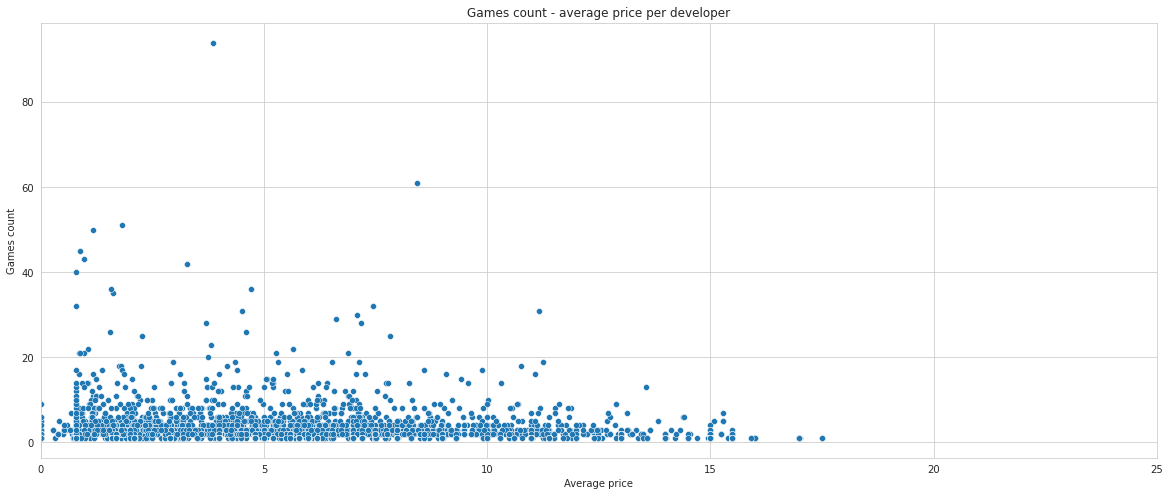

In [73]:
# Calculating average price and number of games published per developer
g = sns.scatterplot(x=agg_developers[('price', 'mean')], y=agg_developers[('name', 'count')])
plt.title('Games count - average price per developer')
plt.xlabel('Average price')
plt.ylabel('Games count')
plt.xlim((0,25))

(0.0, 25.0)

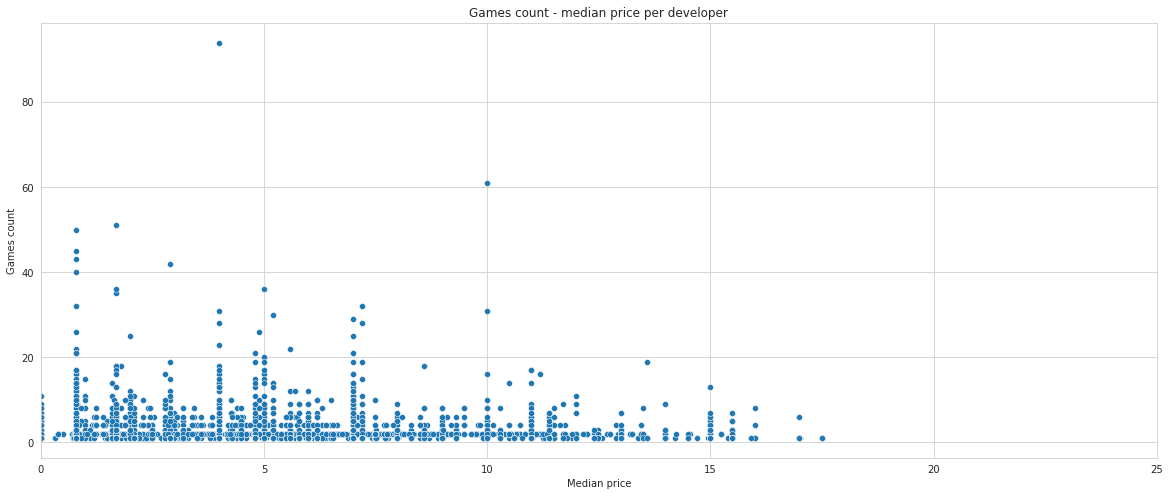

In [75]:
# Calculating median price and number of games published per developer
g = sns.scatterplot(x=agg_developers[('price', 'median')], y=agg_developers[('name', 'count')])
plt.title('Games count - median price per developer')
plt.xlabel('Median price')
plt.ylabel('Games count')
plt.xlim((0,25))

#### **Correlation Matrix Analysis**

Correlation analysis is a statistical method to measure the strength of the linear relationship between two variables and compute their association Correlation analysis calculates the level of change in one variable due to the change in the other. With the degree itself is 0 to 1, 0 means no correlation, and 1 means a strong correlation between two variables.

From here, we can see **the correlation matrix** for overall analysis, and apparently the most correlated factors for the game purchasing is **reviews with number of players**, from `overall reviews` with minimum-maximum number of players.

We can get the insight that to gain more players is almost almost important to gain reviews. Steam is a gamer community platform, so it is **important to hear reviews and feedback from players**.

In [76]:
# Correlation between number of users (owners) and price
df_steam['overall_reviews'].corr(df_steam['price'])

0.010506805139568434

In [77]:
# Correlation between number of users (owners) and platforms
df_steam['average_playtime'].corr(df_steam['price'])

-0.001941362738637778

In [78]:
# Correlation between number of users (owners) and categories
df_steam['average_playtime'].corr(df_steam['overall_reviews'])

0.13670535241954934

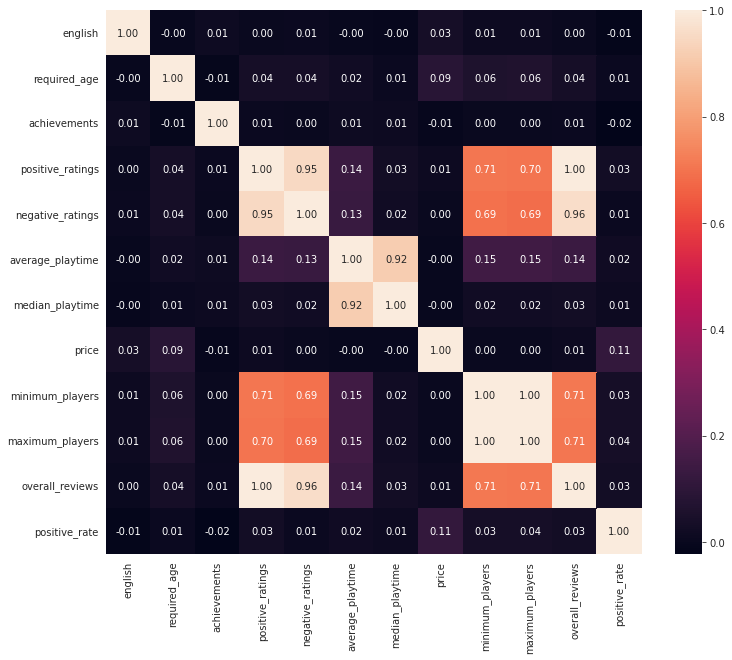

CPU times: user 937 ms, sys: 161 ms, total: 1.1 s
Wall time: 982 ms


In [79]:
# Heatmap Correlation Matrix
%%time
df_steam['appid'] = df_steam['appid'].apply(str)
plt.figure(figsize=(12,10))
sns.heatmap(df_steam.corr(), annot=True, fmt='.2f')
plt.show()

#### **Inferential Statistics Analysis**

After we analyzed the correlation analysis, we will further see what is the significance of `overall_reviews` to game market as one of the factors to consider for publishing games on Steam.

The hypothesis are:

- **H0: The factor are important** to maintain for the development of the gaming market.

- **H1: The factor are not important** to maintain for the development of the gaming market.

The factors refer to the 5 factors mentioned on part 3 "Objection and Goals". If p-value is more than 0.05, so we can conclude that null hypothesis is accepted.

In [80]:
df_ttest = df_steam.groupby(by=["required_age"]).mean()
df_ttest

,english,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price,minimum_players,maximum_players,overall_reviews,positive_rate
required_age,,,,,,,,,,,
0,0.98169,46.17726,707.02246,128.66723,117.14570,117.75302,4.86069,64600.35594,154667.58948,835.68970,0.71280
3,1.00000,19.27273,946.36364,119.81818,169.18182,168.00000,6.25364,47272.72727,111818.18182,1066.18182,0.75153
7,1.00000,12.88889,123.44444,25.22222,53.55556,53.55556,4.90222,15555.55556,46666.66667,148.66667,0.68894
12,0.98438,16.32812,1208.15625,148.18750,193.78125,237.75000,6.14406,155937.50000,347968.75000,1356.34375,0.66561
16,1.00000,25.00000,6754.91558,851.15584,689.39610,364.72727,7.60987,568636.36364,1254805.19481,7606.07143,0.71579
18,0.96476,29.84581,6597.83700,1116.09692,347.96035,211.40969,7.87762,401145.37445,911806.16740,7713.93392,0.73891


In [81]:
#The p-value divided by 2 since the output is two-sided p-value
t_stat,p_val = stats.ttest_1samp(df_ttest.overall_reviews, 500)
print('p-value:',p_val) 
print('t-statistics:',t_stat)

p-value: 0.12932678256465535
t-statistics: 1.814466728111121


In [82]:
# Confidence Interval 95% (overall_review)
average_overall_reviews_pop = np.random.normal(df_ttest.overall_reviews.mean(), df_ttest.overall_reviews.std(), 10000)

ci = stats.norm.interval(0.95, df_ttest.overall_reviews.mean(), df_ttest.overall_reviews.std())
print(ci)

(-3814.1677520641383, 10056.46351258875)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


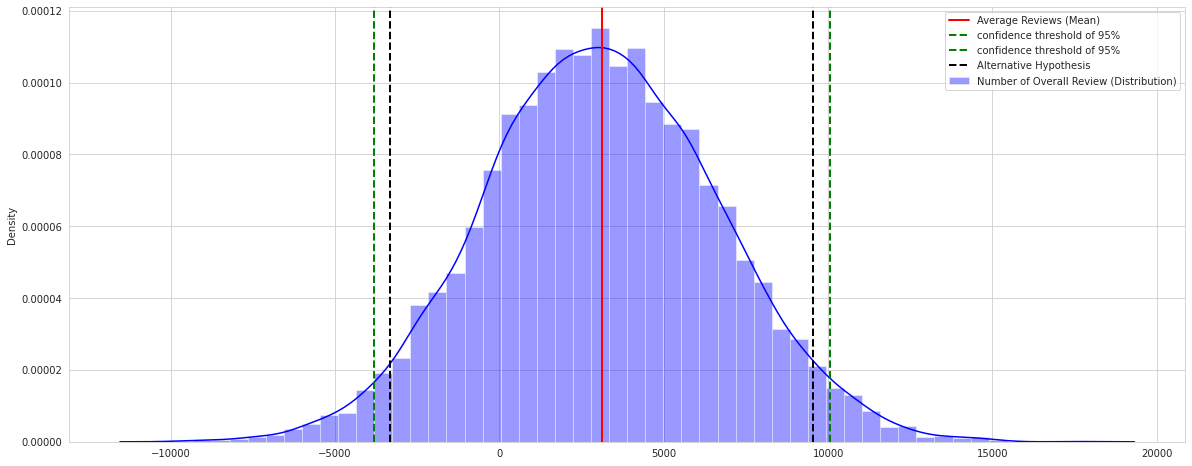

In [83]:
# Plotting histogram for Confidence Interval 95% (overall_review)
sns.distplot(average_overall_reviews_pop, label='Number of Overall Review (Distribution)', color='blue')
plt.axvline(df_ttest.overall_reviews.mean(), color='red', linewidth=2, label='Average Reviews (Mean)')

plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(ci[0], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')

plt.axvline(average_overall_reviews_pop.mean() + t_stat*average_overall_reviews_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.axvline(average_overall_reviews_pop.mean() - t_stat*average_overall_reviews_pop.std(), color='black', linestyle='dashed', linewidth=2)
plt.legend()

In [84]:
#Two-tailed p-value of "Price"
t_stat,p_val = stats.ttest_1samp(df_ttest.price, 500)
print('p-value:',p_val) 
print('t-statistics:',t_stat)

p-value: 2.5677633043107693e-14
t-statistics: -941.3447926562475


In [85]:
#Two-tailed p-value of "Language"
t_stat,p_val = stats.ttest_1samp(df_ttest.english, 500)
print('p-value:',p_val) 
print('t-statistics:',t_stat)

p-value: 4.1738658063264596e-24
t-statistics: -85418.72326318662


In [86]:
#Two-tailed p-value of "Average Playtime"
t_stat,p_val = stats.ttest_1samp(df_ttest.average_playtime, 500)
print('p-value:',p_val) 
print('t-statistics:',t_stat)

p-value: 0.05311290224597963
t-statistics: -2.5209522210091886


In [87]:
#Two-tailed p-value of "Achievements"
t_stat,p_val = stats.ttest_1samp(df_ttest.achievements, 500)
print('p-value:',p_val) 
print('t-statistics:',t_stat)

p-value: 2.2615277747483728e-09
t-statistics: -96.53405452973065


**Results of p-values:**

If p-value is more than 0.05, so we can conclude that null hypothesis is accepted. If p-value is less than 0.05, null hypothesis is rejected.

We can see that **Ratings** and **Average Playtime** are significant factors to succeed the market on Steam, because once again, Steam is for gaming community platform, so the voice of players are important.

- p-Value "Language": `4.1738658063264596e-24`
- p-value "Achievements": `2.2615277747483728e-09`
- **p-value "Ratings":** `0.12932678256465535`
- p-value "Price": `2.5677633043107693e-14`
- **p-value "Average Playtime":** `0.05311290224597963`

## **7. Conclusion and Suggestion**

There are some points that can be taken from the data review and analysis, which can be useful to answer problems and set the gaming business goals. The focus of this analysis is to solve the problem "*The Steam users preference for purchasing a game*".

**1. Community Engagement Game Design Approach**

Since it can be seen that `Rating` or Reviews from Steam users are important, the game design should be based on community engagement. The most correlated and significant factor for the game purchasing rate is `reviews correlated with number of players and playtime`. We can get the insight that to gain more players is almost almost important to gain reviews. Steam is a gamer community platform, so it is important to hear reviews and feedback from players.


**2. Marketing on Social Medias**

Reducing the cost production to publish the game on Steam is important, because there are many developers and publishers selling tunderpricedheir game , as we can see from `Reviewing Price based on Developers Aggregate`. By marketing on Social Medias, people will quickly spread the news and *hype* so this can as an approach of marketing based on Community Engagement. For example, making an interesting publication on Twitter or other social medias.

**3. Planning the age of the game**

As we analyzed before, there is a tendency of growth every year for publishing games on Steam. However, the number of games published will create such a huge competition between games, which an be seen from the data review, such as achievements.